<h1 style='color:Blue'>Prediction</h1>

In [3]:
import torch
from models import ResNet50, mobilenet
from torchvision import transforms
from torch.utils.data import DataLoader

import PIL.Image
import numpy as np

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
pretrained_model_path = "3dface_models/logs_mobileNet_v2_with_th_12-18.14-41/3dface-model.pkl"

In [4]:
input_channels = 4
num_of_classes = 83

In [5]:
model = mobilenet(input_channels, num_of_classes, pretrained=False)

In [7]:
model.load_state_dict(torch.load(pretrained_model_path, map_location=device))

<All keys matched successfully>

In [8]:
model = model.to(device)

In [9]:
criterion = torch.nn.CrossEntropyLoss()

In [10]:
model.eval()

MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(4, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

In [1]:
path = '3dface_th_align/annieanne/'
rgb_image_path = path + 'annieanne2_1.png'
dep_image_path = path + 'annieanne2_1.npy'

In [4]:
fp = open(rgb_image_path,"rb")
image = PIL.Image.open(fp)

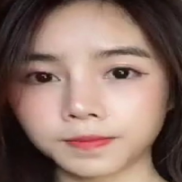

In [5]:
image

In [6]:
rgb_image = np.asarray(image)
dep_image = np.load(dep_image_path)
dep_image = np.expand_dims(dep_image, axis=-1)
image = np.concatenate((rgb_image, dep_image), axis=-1)

In [7]:
image

array([[[27, 13, 10,  0],
        [27, 13, 10,  0],
        [28, 14, 13,  0],
        ...,
        [60, 49, 45,  0],
        [66, 55, 51,  0],
        [79, 68, 64,  0]],

       [[27, 13, 11,  0],
        [28, 14, 12,  0],
        [28, 14, 14,  0],
        ...,
        [60, 49, 45,  0],
        [61, 50, 47,  0],
        [66, 55, 52,  0]],

       [[28, 14, 12,  0],
        [28, 14, 13,  0],
        [30, 16, 16,  0],
        ...,
        [59, 48, 44,  0],
        [59, 48, 44,  0],
        [60, 49, 45,  0]],

       ...,

       [[40, 24, 22,  0],
        [40, 26, 22,  0],
        [40, 27, 23,  0],
        ...,
        [64, 49, 46,  0],
        [64, 50, 46,  0],
        [64, 52, 49,  0]],

       [[38, 25, 20,  0],
        [39, 25, 20,  0],
        [38, 26, 22,  0],
        ...,
        [64, 49, 46,  0],
        [64, 49, 46,  0],
        [65, 51, 48,  0]],

       [[38, 25, 22,  0],
        [38, 25, 21,  0],
        [36, 26, 21,  0],
        ...,
        [67, 52, 49,  0],
        [66, 51

In [16]:
from dataset.RGBD_transforms import Resize

In [17]:
train_transform = transforms.Compose([
                    Resize(224),
                    transforms.ToTensor(),
                ])

In [18]:
tensor_RGBD = train_transform(image)

In [19]:
tensor_RGBD = tensor_RGBD.to(device)

In [20]:
predictions = model(tensor_RGBD[None, ...])

In [21]:
predictions

tensor([[ 1.7237e-01,  7.7489e-01, -5.7655e-01,  1.1627e+00,  1.3690e+00,
          7.0726e-01, -1.1054e+00, -1.3681e+00, -7.2503e-01, -2.1893e+00,
          8.5343e+00,  1.8116e-01, -1.4930e+00, -1.0749e+00, -2.4172e+00,
         -2.1256e+00, -7.7027e-01,  1.8344e+00, -3.0858e+00,  8.5979e-02,
         -1.5615e+00, -5.5665e-01,  3.6258e-02, -2.0457e+00,  1.6854e+00,
          3.5512e+00, -1.8578e-02,  9.4607e-02,  2.1466e-01, -1.8574e+00,
         -1.2284e+00, -6.6623e-01,  7.5712e-01,  3.7270e-01, -2.2655e+00,
         -1.1750e+00,  1.4195e+00,  4.6683e+00,  1.3141e+00, -2.6469e+00,
         -2.0638e+00,  3.5586e-01, -4.0445e-01, -3.0765e-01, -5.9777e-01,
         -4.2601e-01, -1.7999e+00,  1.0334e+00, -2.5855e-01,  1.0437e-01,
          5.3271e-01, -5.0745e-01,  2.1736e+00, -6.9680e-01,  1.5888e+00,
          1.9819e+00,  1.7169e+00, -1.3760e+00,  1.4083e-02, -3.8205e-04,
         -1.6566e+00, -1.3933e+00,  5.8474e-02,  7.4806e-01,  4.0541e-01,
          5.2200e-01, -1.5835e+00, -9.

In [22]:
print(max(predictions[0]).item())

8.534337043762207


In [23]:
_, preds = torch.max(predictions, 1)
preds.item()

10

In [ ]:
path = '3dface_th_align/annieanne/'
rgb_image_path = path + 'annieanne2_1.png'
dep_image_path = path + 'annieanne2_1.npy'

In [24]:
path = '3dface_th_align/bietheska/'
rgb_image_path = path + 'bietheska2_0.png'
dep_image_path = path + 'bietheska2_0.npy'

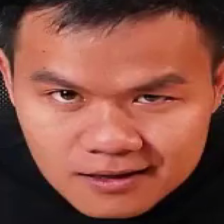

In [25]:
fp = open(rgb_image_path,"rb")
image = PIL.Image.open(fp)
image